In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [20]:
# Load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('Model loaded Sucessfully')

Model loaded Sucessfully


In [ ]:
from PIL import Image
from keras.preprocessing.image import load_img

In [23]:
path = './images/N15.jpeg'
image = load_img(path)
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255  # Convert into array and get the normalized output

In [24]:
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 1080
Width of the image = 1920


In [25]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

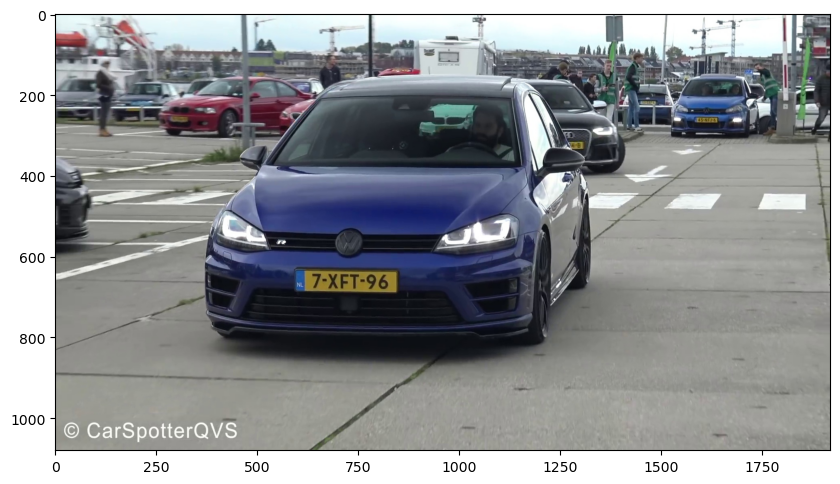

In [26]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [27]:
image_arr_224.shape

(224, 224, 3)

In [28]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [29]:
# Make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 24s 24s/step


array([[5.663088e-07, 9.999999e-01, 5.455063e-01, 5.868666e-01]],
      dtype=float32)

In [30]:
denorm = np.array([w,w,h,h])
coords = coords * denorm
print(coords)

[[1.08731292e-03 1.91999977e+03 5.89146802e+02 6.33815947e+02]]


In [31]:
coords = coords.astype(np.int32)
coords

array([[   0, 1919,  589,  633]])

In [32]:
import cv2

(100, 689) (1919, 633)


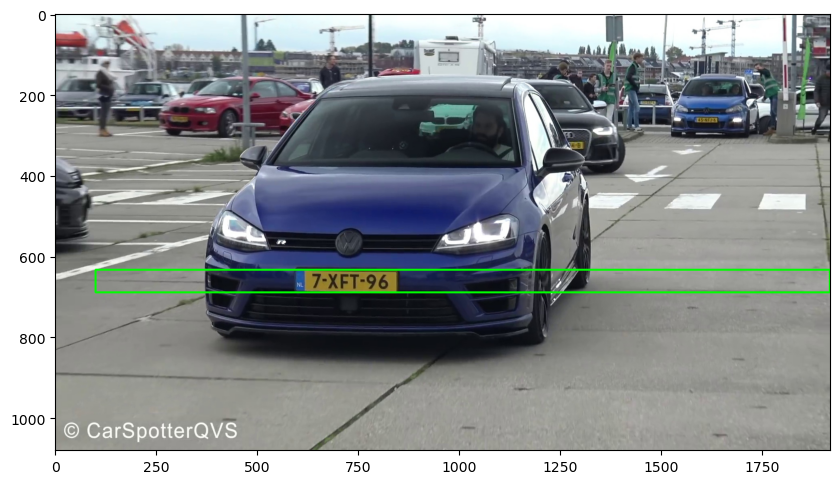

In [33]:
xmin, xmax,ymin,ymax = coords[0]
pt1 =(+100+xmin,ymin+100)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [34]:
#create pipline
def object_detection(path):
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)


    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    coords[0][0]=100
    coords[0][2]+=100
    coords[0][1]-=100
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

In [35]:
#number plate recognitio

In [36]:
xmax

1919

1/1 [==============================] - 1s 953ms/step
(100, 815) (1819, 606)


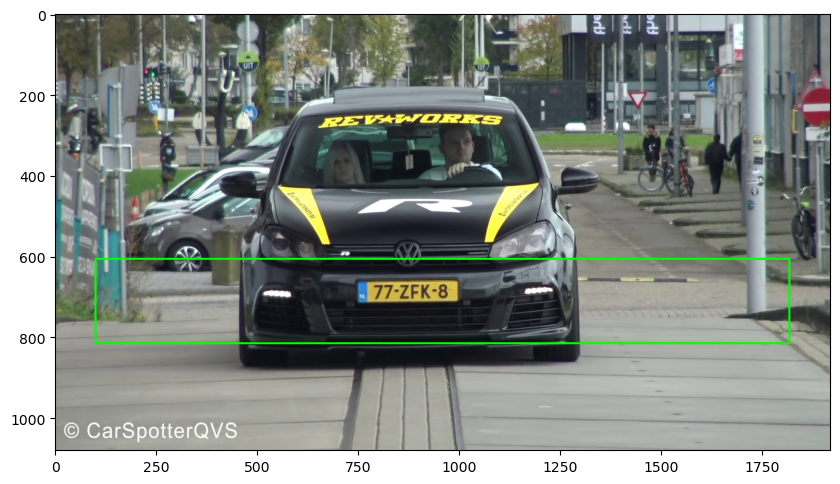

In [39]:
path = './images/N28.jpeg'
image,coords=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [40]:
import pytesseract as pt


In [41]:
import matplotlib.pyplot as plt

In [42]:
coords[0]

array([ 100, 1819,  815,  606])

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = np.array(Image.open(path))  # assuming coords is a list
print("xmin, xmax, ymin, ymax:", xmin, xmax, ymin, ymax)

if len(coords) == 0:
    raise ValueError("No coordinates provided.")

xmin, xmax, ymin, ymax = coords[0]

print(xmin)
if xmin < 0 or xmax > img.shape[1] or ymin < 0 or ymax > img.shape[0]:
    raise ValueError("Invalid coordinates.")

print("Image shape:", img.shape)
print("xmin, xmax, ymin, ymax:", xmin, xmax, ymin, ymax)

roi = img[ymin:ymax, xmin:xmax]

if roi.size == 0:
    raise ValueError("ROI is empty.")

roi[0] += 100  # Add 100 to the first array in roi

print("Shape of roi:", roi.shape)
print("ymin-ymax:", ymin - ymax)

plt.imshow(roi)
plt.show()


xmin, xmax, ymin, ymax: 100 1819 815 606
100
Image shape: (1080, 1920, 3)
xmin, xmax, ymin, ymax: 100 1819 815 606
Shape of roi: (209, 1719, 3)
ymin-ymax: -209


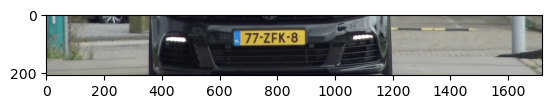

In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = np.array(Image.open(path))  # assuming coords is a list
print("xmin, xmax, ymin, ymax:", xmin, xmax, ymin, ymax)

if len(coords) == 0:
    raise ValueError("No coordinates provided.")

xmin, xmax, ymin, ymax = coords[0]

print(xmin)
if xmin < 0 or xmax > img.shape[1] or ymin < 0 or ymax > img.shape[0]:
    raise ValueError("Invalid coordinates.")

print("Image shape:", img.shape)
print("xmin, xmax, ymin, ymax:", xmin, xmax, ymin, ymax)

# Swap ymin and ymax
ymin, ymax = min(ymin, ymax), max(ymin, ymax)

roi = img[ymin:ymax, xmin:xmax]

if roi.size == 0:
    raise ValueError("ROI is empty.")

roi[roi == 0] = 1  # Replace 0 elements with 1

print("Shape of roi:", roi.shape)
print("ymin-ymax:", ymin - ymax)

plt.imshow(roi)
plt.show()


In [65]:
import pytesseract

# Apply OCR to the ROI
extracted_text = pytesseract.image_to_string(roi)

# Print the extracted text
print(extracted_text)
